In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "ecommerce_customer_data.csv"  
data = pd.read_csv(file_path)

# 1. Aggregated Transaction Features

## a. TotalAmount: Bar chart for total spending by customer segments

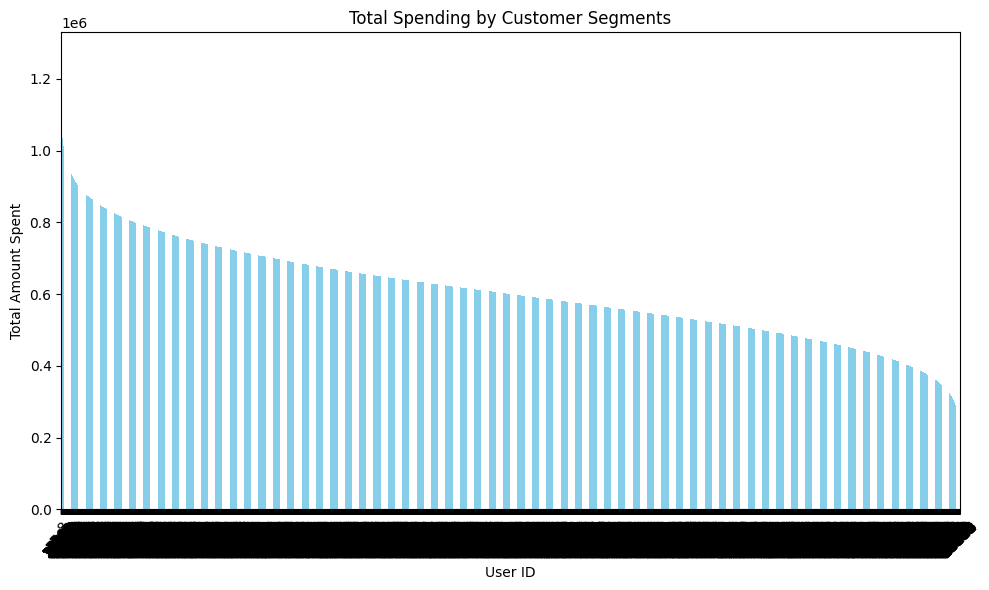

In [5]:
# Ensuring  column names are correctly referenced
columns = ['TotalAmount', 'AvgAmount', 'MaxAmount', 'MinAmount', 'AmountStd', 'TransactionCount']

plt.figure(figsize=(10, 6))
data.groupby('UserID')['TotalAmount'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Spending by Customer Segments')
plt.xlabel('User ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## b. AvgAmount: Distribution plot

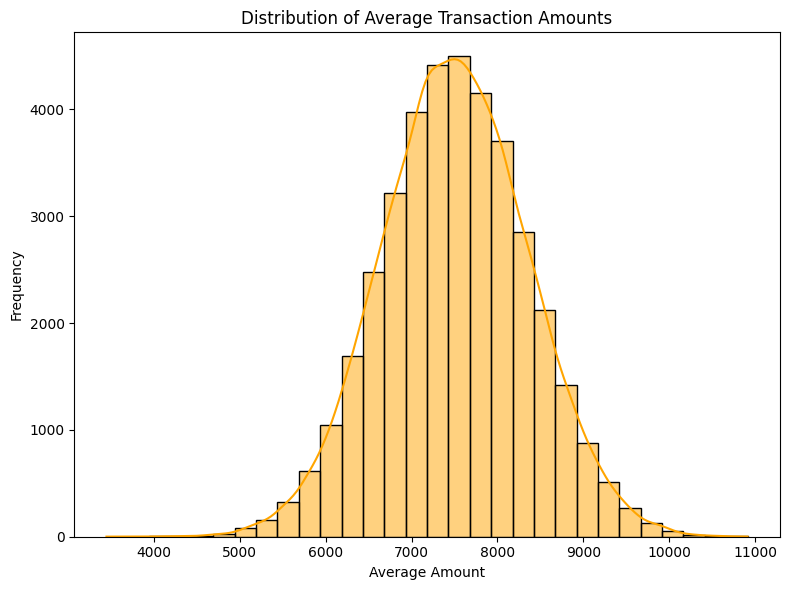

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['AvgAmount'], kde=True, bins=30, color='orange')
plt.title('Distribution of Average Transaction Amounts')
plt.xlabel('Average Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## c. MaxAmount: Boxplot for outliers

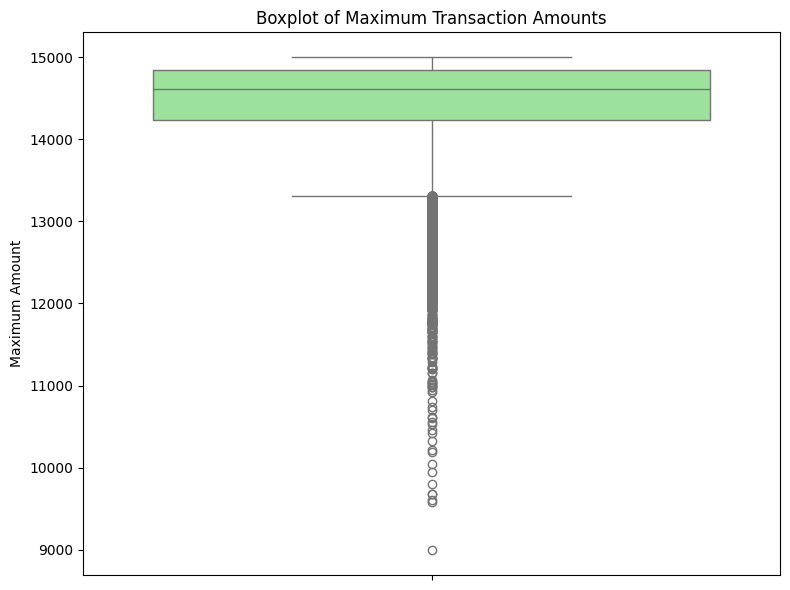

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MaxAmount'], color='lightgreen')
plt.title('Boxplot of Maximum Transaction Amounts')
plt.ylabel('Maximum Amount')
plt.tight_layout()
plt.show()

## d. MinAmount: Boxplot or Violin plot

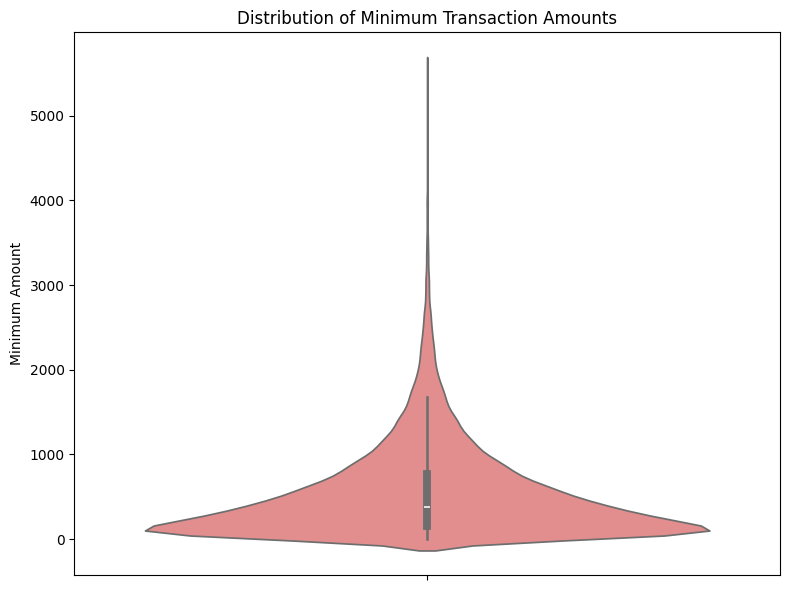

In [10]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['MinAmount'], color='lightcoral')
plt.title('Distribution of Minimum Transaction Amounts')
plt.ylabel('Minimum Amount')
plt.tight_layout()
plt.show()

## e. AmountStd: Histogram

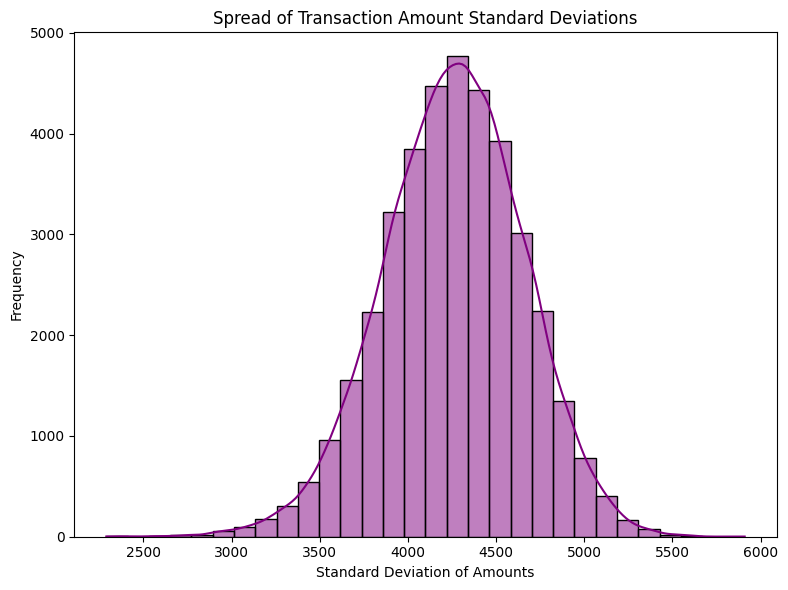

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['AmountStd'], kde=True, bins=30, color='purple')
plt.title('Spread of Transaction Amount Standard Deviations')
plt.xlabel('Standard Deviation of Amounts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## f. TransactionCount: Bar chart for transaction counts by customer

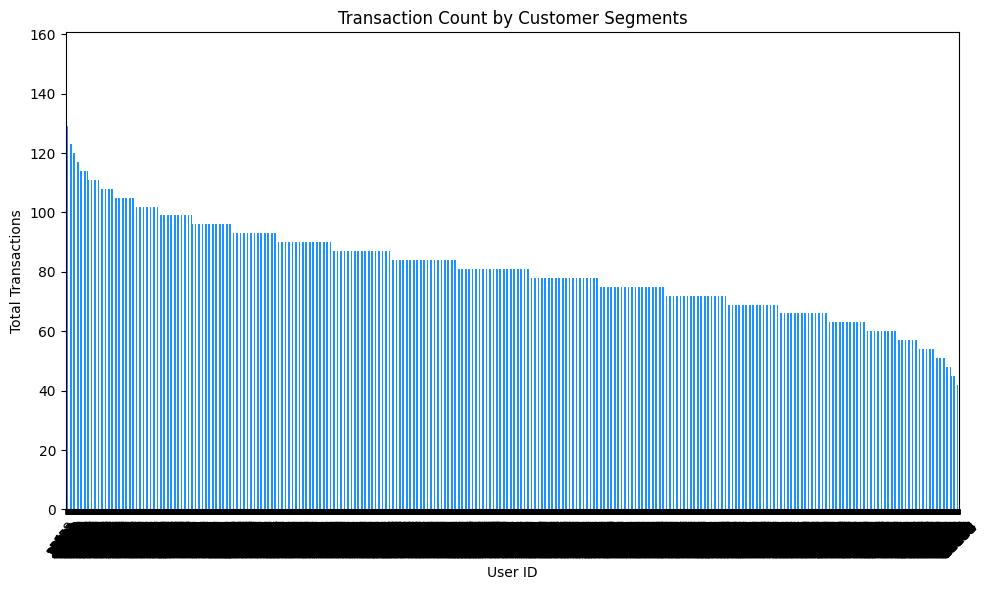

In [15]:
plt.figure(figsize=(10, 6))
data.groupby('UserID')['TransactionCount'].sum().sort_values(ascending=False).plot(kind='bar', color='dodgerblue')
plt.title('Transaction Count by Customer Segments')
plt.xlabel('User ID')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Understanding spending habits and transaction frequency across different segments.
- Identifying high-spending customers or outliers in transactions.

# 2. Time-Based Features: 

## PreferredHour: Heatmap or bar chart to show peak transaction hours.

### Bar Chart

In [16]:
# Grouping by PreferredHour and count the number of transactions
hourly_transactions = data.groupby('PreferredHour')['UserID'].count().reset_index()

# Renaming columns for clarity
hourly_transactions.columns = ['PreferredHour', 'TransactionCount']

# Sorting by hour to ensure proper ordering
hourly_transactions = hourly_transactions.sort_values('PreferredHour')

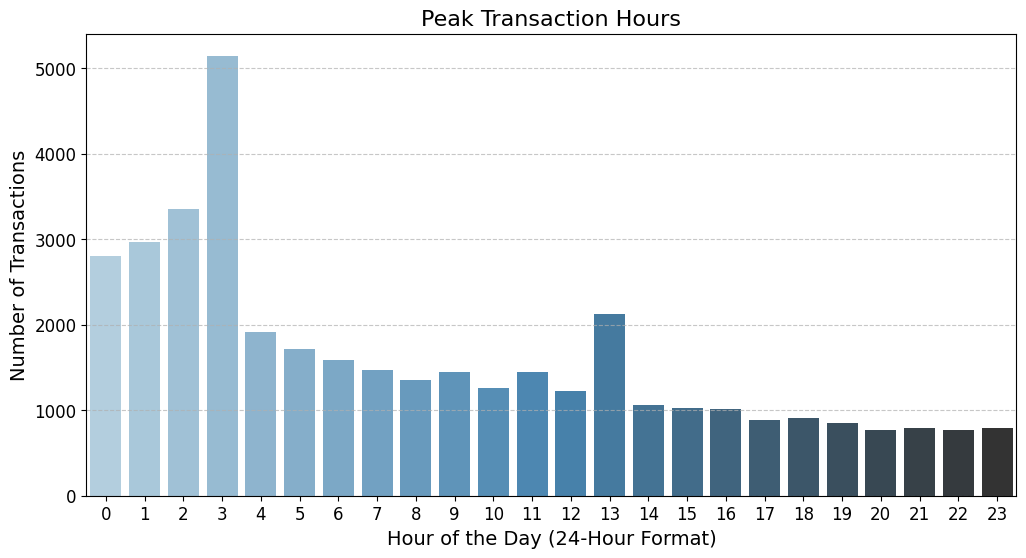

In [17]:
# Bar chart for peak transaction hours
plt.figure(figsize=(12, 6))
sns.barplot(
    x='PreferredHour', 
    y='TransactionCount', 
    data=hourly_transactions, 
    hue='PreferredHour',  # Assigning x variable to hue
    dodge=False,  # Ensuring bars overlap as in a standard bar chart
    palette='Blues_d',
    legend=False  # Suppressing legend
)

plt.title('Peak Transaction Hours', fontsize=16)
plt.xlabel('Hour of the Day (24-Hour Format)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Heatmap

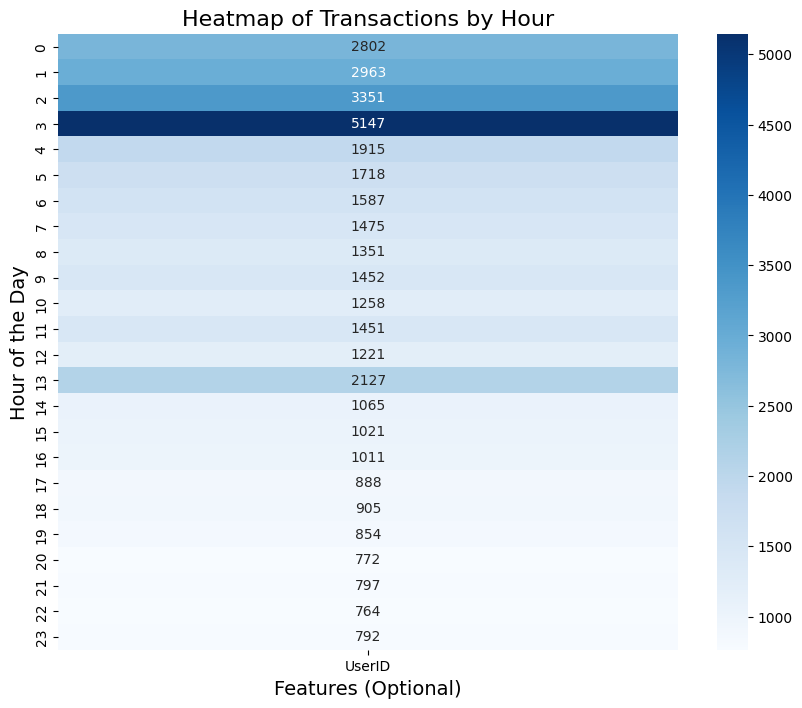

In [18]:
# Creating a pivot table for transactions across hours and another feature
hourly_pivot = data.pivot_table(index='PreferredHour', values='UserID', aggfunc='count')

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(hourly_pivot, annot=True, fmt="d", cmap='Blues')

plt.title('Heatmap of Transactions by Hour', fontsize=16)
plt.xlabel('Features (Optional)', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.show()

## Recency: Histogram to depict the frequency of days since the most recent transaction.

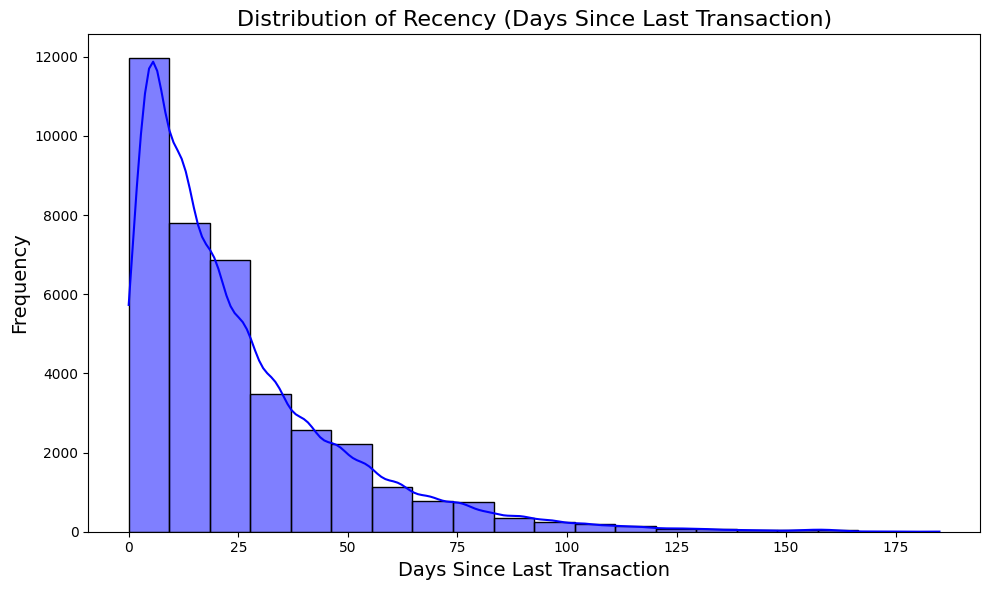

In [19]:
# Plotting histogram for 'Recency'
plt.figure(figsize=(10, 6))
sns.histplot(data['Recency'], bins=20, kde=True, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Recency (Days Since Last Transaction)', fontsize=16)
plt.xlabel('Days Since Last Transaction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Showing the plot
plt.tight_layout()
plt.show()

- Patterns of recent activity and preferred transaction times can guide timing of marketing campaigns.

# 3. Behavioral Features

In [20]:
# Setting a consistent style for visualizations
sns.set(style="whitegrid")

## a. FraudRate: Pie Chart to Illustrate the Proportion of Fraudulent Transactions

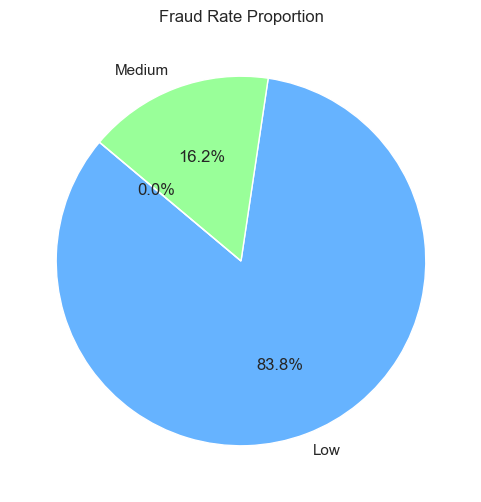

In [21]:
fraud_bins = pd.cut(data['FraudRate'], bins=[0, 0.1, 0.5, 1], labels=['Low', 'Medium', 'High'])
fraud_rate_summary = fraud_bins.value_counts()

plt.figure(figsize=(6, 6))
fraud_rate_summary.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.title('Fraud Rate Proportion')
plt.ylabel('')  # Remove the y-axis label
plt.show()

## b. DeclineRate: Bar Chart or Line Plot to Show Trends in Declined Transactions

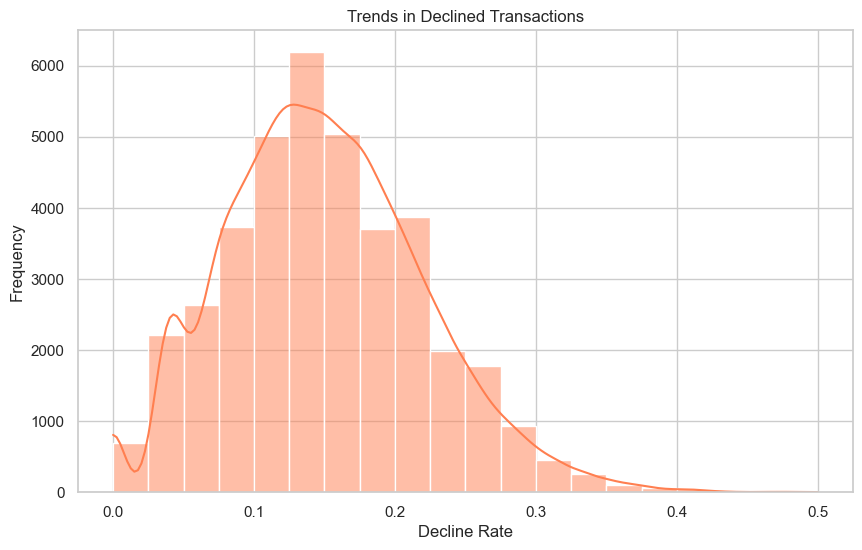

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DeclineRate'], bins=20, kde=True, color='coral')
plt.title('Trends in Declined Transactions')
plt.xlabel('Decline Rate')
plt.ylabel('Frequency')
plt.show()

## c. UniquePaymentMethods: Histogram to Visualize the Distribution of Unique Payment Methods

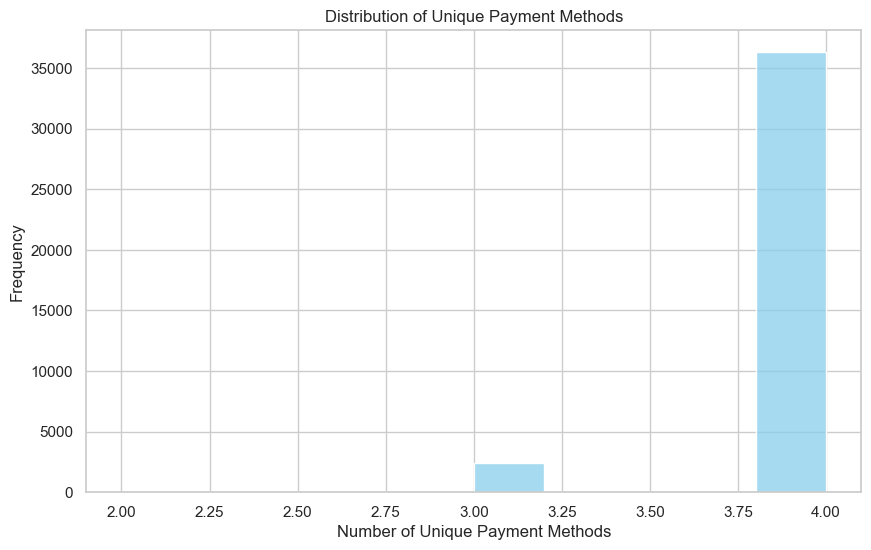

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['UniquePaymentMethods'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Unique Payment Methods')
plt.xlabel('Number of Unique Payment Methods')
plt.ylabel('Frequency')
plt.show()

## d. PreferredDevice: Bar Chart to Display the Most Commonly Used Devices

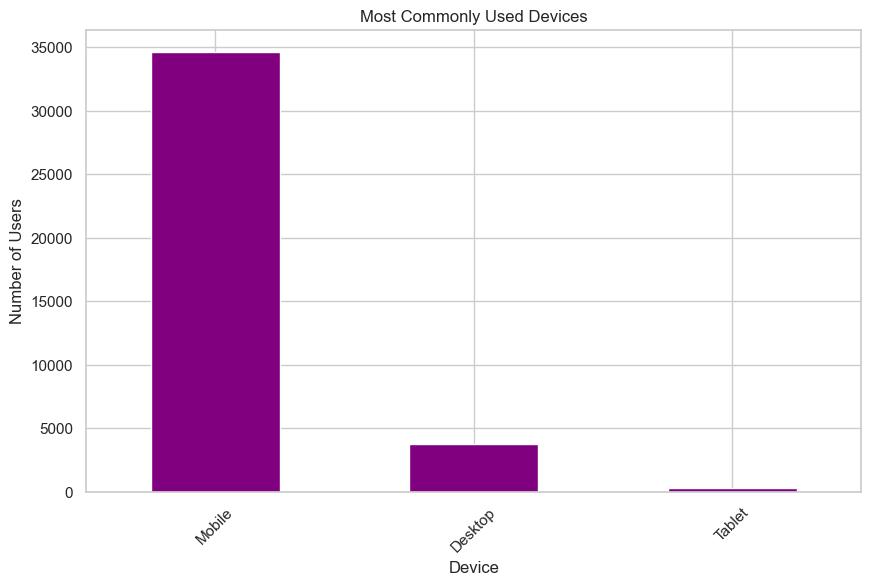

In [24]:
preferred_device_counts = data['PreferredDevice'].value_counts()

plt.figure(figsize=(10, 6))
preferred_device_counts.plot(kind='bar', color='purple')
plt.title('Most Commonly Used Devices')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

- Behavior patterns that could be targeted for fraud detection and personalized marketing strategies.

## 4. Location-Based Features

## AvgLatitude and AvgLongitude: Scatter plot to show the most frequent transaction locations.

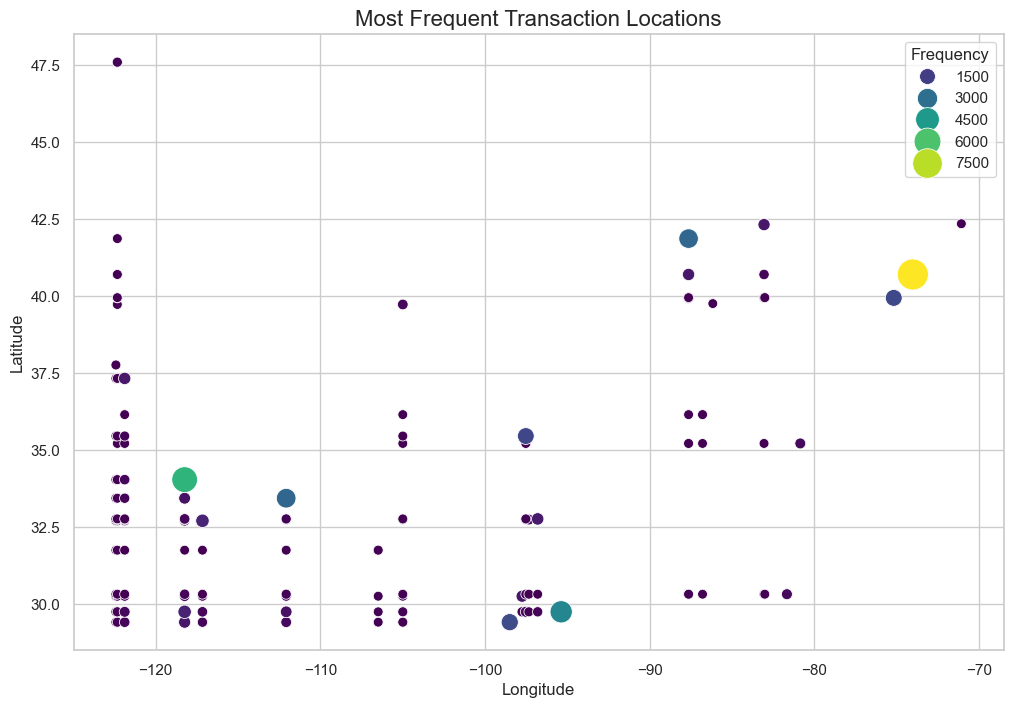

In [25]:
# Group by Lat and Long to find the most frequent transaction locations
location_frequency = data.groupby(['Lat', 'Long']).size().reset_index(name='Frequency')

# Scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='Long', y='Lat', size='Frequency', 
    sizes=(50, 500), hue='Frequency', palette='viridis', 
    data=location_frequency
)

# Customizing the plot
scatter_plot.set_title('Most Frequent Transaction Locations', fontsize=16)
scatter_plot.set_xlabel('Longitude', fontsize=12)
scatter_plot.set_ylabel('Latitude', fontsize=12)
scatter_plot.legend(title='Frequency', loc='upper right')
plt.grid(True)

# Showing the plot
plt.show()

- The scatter plot will display transaction locations, with larger and more prominently colored points indicating higher frequency locations.
- Geo-location trends for understanding customer activity hotspots, aiding location-specific marketing efforts.

## 5. Demographic Features

## a. Histogram for AvgCustomerAge

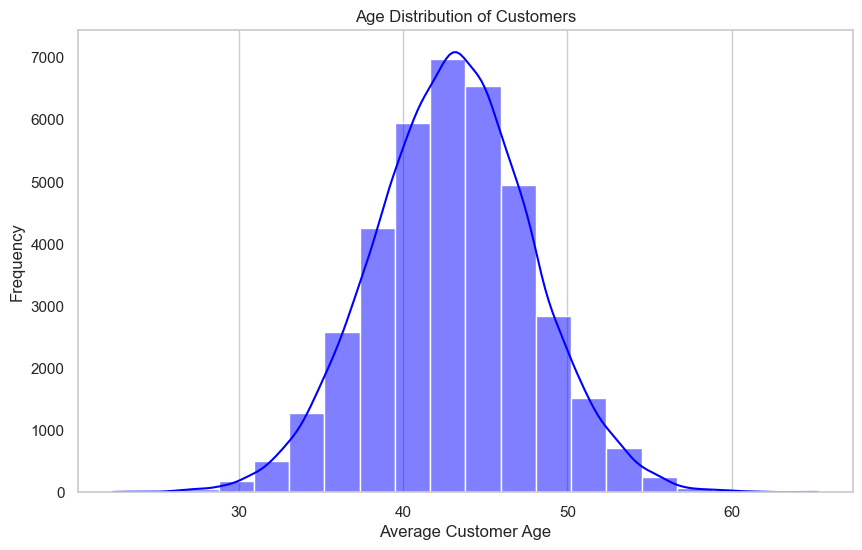

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AvgCustomerAge'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Average Customer Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

## b. Line Chart for AvgAccountAge

#### Line Chart

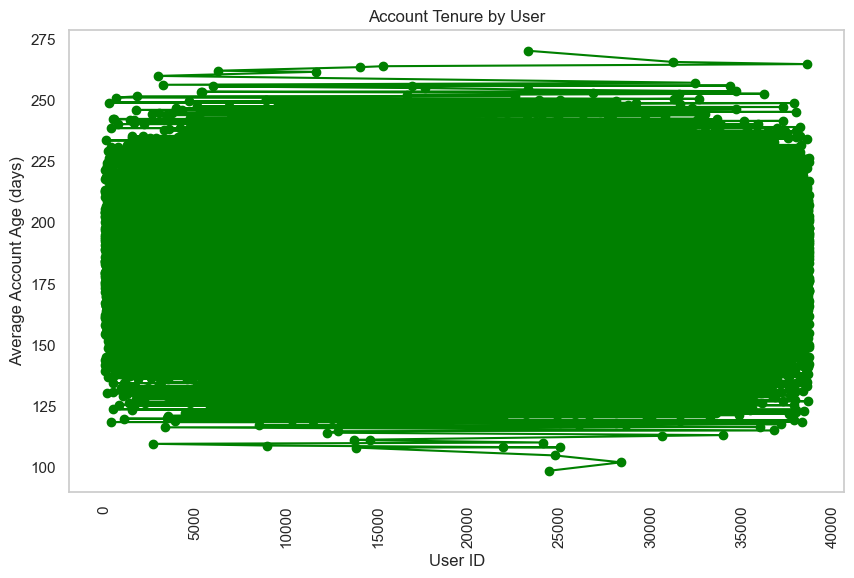

In [27]:
plt.figure(figsize=(10, 6))
data_sorted = data.sort_values('AvgAccountAge')
plt.plot(data_sorted['UserID'], data_sorted['AvgAccountAge'], marker='o', color='green')
plt.title('Account Tenure by User')
plt.xlabel('User ID')
plt.ylabel('Average Account Age (days)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## c. Scatter Plot or Boxplot for AvgBasketSize

#### Scatter Plot

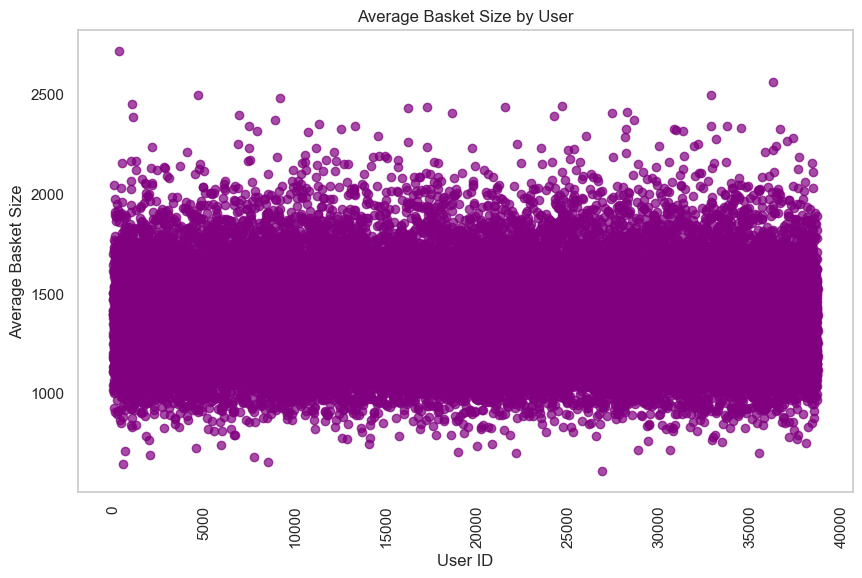

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data['UserID'], data['AvgBasketSize'], alpha=0.7, c='purple')
plt.title('Average Basket Size by User')
plt.xlabel('User ID')
plt.ylabel('Average Basket Size')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Boxplot

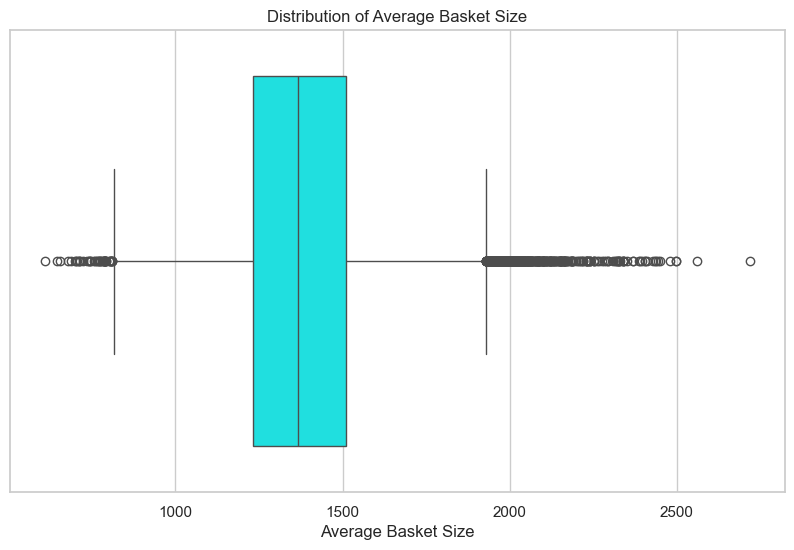

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AvgBasketSize'], color='cyan')
plt.title('Distribution of Average Basket Size')
plt.xlabel('Average Basket Size')
plt.show()

- Demographic insights that help in creating targeted offers and understanding purchasing behavior based on age and account longevity.

# 6. Merchant Category Features

## [CategoryName]: Bar chart to show counts of transactions per merchant category.

C:\Users\Kamarley\AppData\Local\Temp\ipykernel_9040\2715074744.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=sns.color_palette("viridis", len(category_counts)))


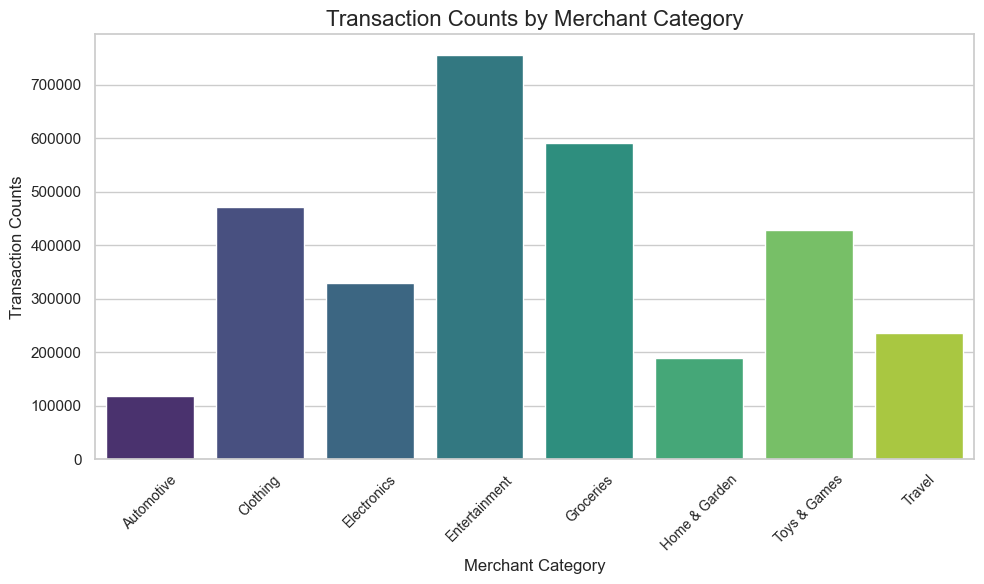

In [35]:
# Selecting merchant category columns
merchant_categories = ['Automotive', 'Clothing', 'Electronics', 'Entertainment', 
                       'Groceries', 'Home & Garden', 'Toys & Games', 'Travel']

# Aggregating transaction counts for each category
category_counts = data[merchant_categories].sum()

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette=sns.color_palette("viridis", len(category_counts)))

# Adding chart labels
plt.title("Transaction Counts by Merchant Category", fontsize=16)
plt.xlabel("Merchant Category", fontsize=12)
plt.ylabel("Transaction Counts", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Showing the plot
plt.show()


- Favorite shopping categories, guiding targeted marketing campaigns or merchandising strategies.

# 7. Transaction Status Features

## CompletedRate, FailedRate, and PendingRate: Pie chart or stacked bar chart to visualize transaction statuses.

### Pie Chart 

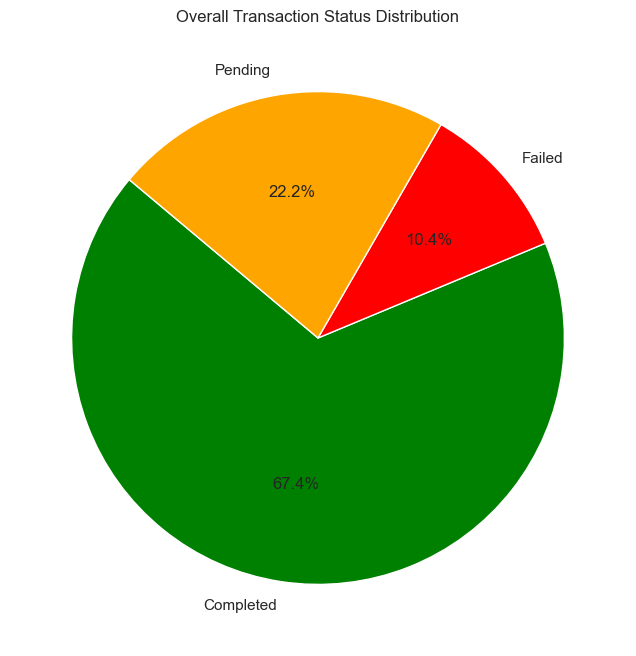

In [36]:
# Aggregating the rates (optional - for overall proportions)
aggregated_rates = data[['CompletedRate', 'FailedRate', 'PendingRate']].mean()

# Pie Chart for Transaction Status
plt.figure(figsize=(8, 8))
plt.pie(
    aggregated_rates, 
    labels=['Completed', 'Failed', 'Pending'], 
    autopct='%1.1f%%', 
    colors=['green', 'red', 'orange'], 
    startangle=140
)
plt.title("Overall Transaction Status Distribution")
plt.show()

### Stacked Bar Chart

<Figure size 1200x600 with 0 Axes>

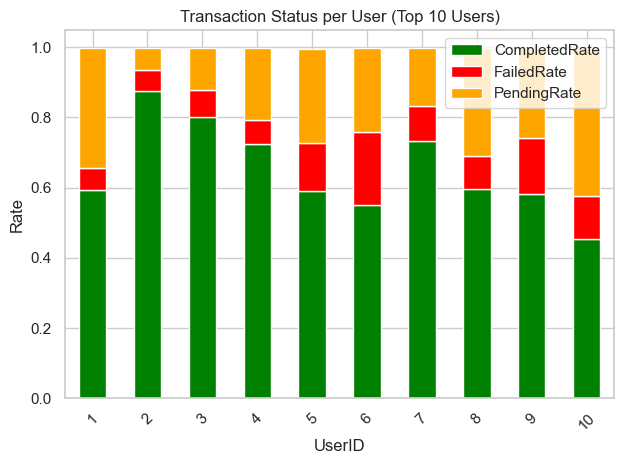

In [37]:
# Stacked Bar Chart for Transaction Status per User
plt.figure(figsize=(12, 6))
data[['CompletedRate', 'FailedRate', 'PendingRate']].head(10).plot(
    kind='bar', 
    stacked=True, 
    color=['green', 'red', 'orange']
)
plt.title("Transaction Status per User (Top 10 Users)")
plt.xlabel("UserID")
plt.ylabel("Rate")
plt.xticks(range(10), data['UserID'].head(10), rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- Insights into transaction completions, failures, and pending transactions for operational improvements and customer service focus.